In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset/airline_passenger_satisfaction.csv')

In [4]:
df.shape

(103904, 25)

In [6]:
df.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [7]:
columns_to_drop = ['id', 'Unnamed: 0']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [ ]:
df.describe()

In [10]:
# Calcular el porcentaje de NaN y ceros
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum() / df.isin([0]).count() * 100).sort_values(ascending=False)

# Crear DataFrames para estadísticas de NaN y ceros
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Porcentaje NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Ceros', 'Porcentaje Ceros'])


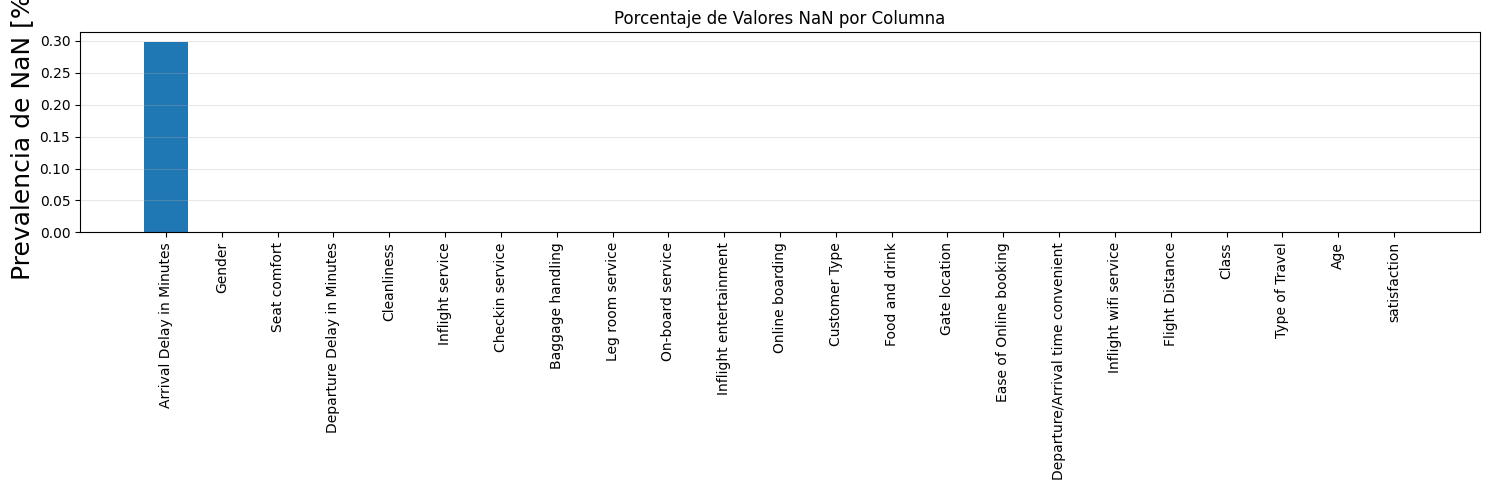

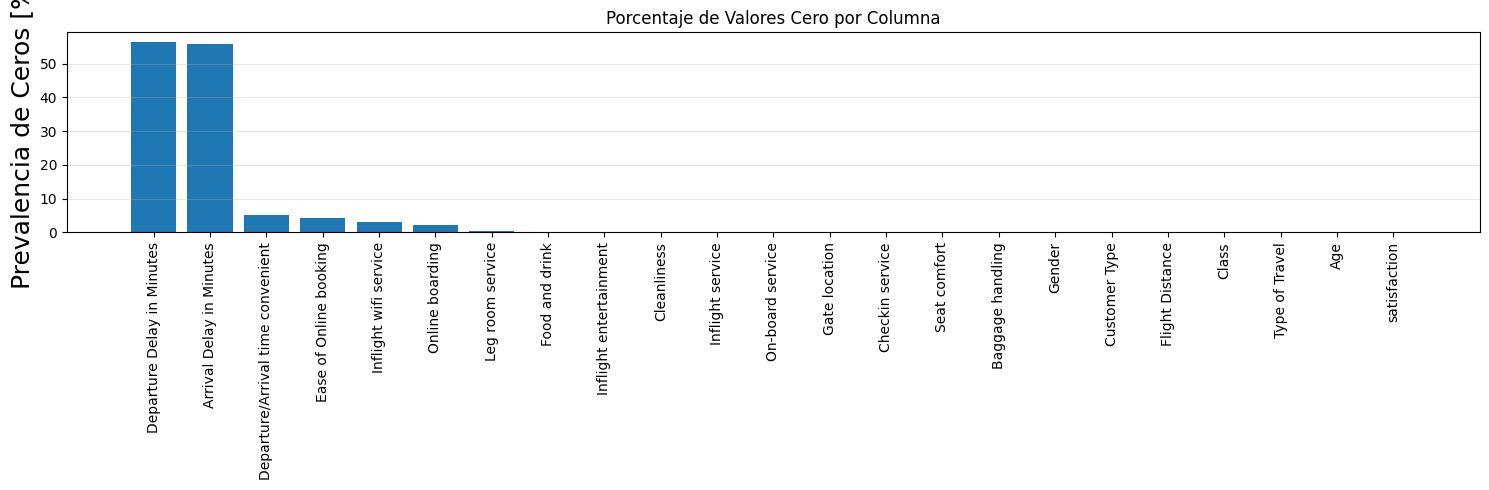

In [11]:
# Graficar porcentajes de NaN
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_nans)), df_nans['Porcentaje NaN'].values)
plt.xticks(np.arange(len(df_nans)), df_nans.index, rotation='vertical')
plt.ylabel('Prevalencia de NaN [%]', fontsize=18)
plt.title('Porcentaje de Valores NaN por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
plt.close()

# Graficar porcentajes de Ceros
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_zeros)), df_zeros['Porcentaje Ceros'].values)
plt.xticks(np.arange(len(df_zeros)), df_zeros.index, rotation='vertical')
plt.ylabel('Prevalencia de Ceros [%]', fontsize=18)
plt.title('Porcentaje de Valores Cero por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [12]:
#Comprobamos filas duplicadas
df.duplicated().sum()

0

In [16]:
#División entre columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print('Columnas Numéricas:')
print(numerical_cols.tolist())
print('')
print('Columnas Categóricas:')
print(categorical_cols.tolist())

Columnas Numéricas:
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Columnas Categóricas
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [15]:
# A modo de ejemplo resumimos las columnas categóricas
df[categorical_cols].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## Columnas numéricas

Buscamos Outliers mediante Boxplot

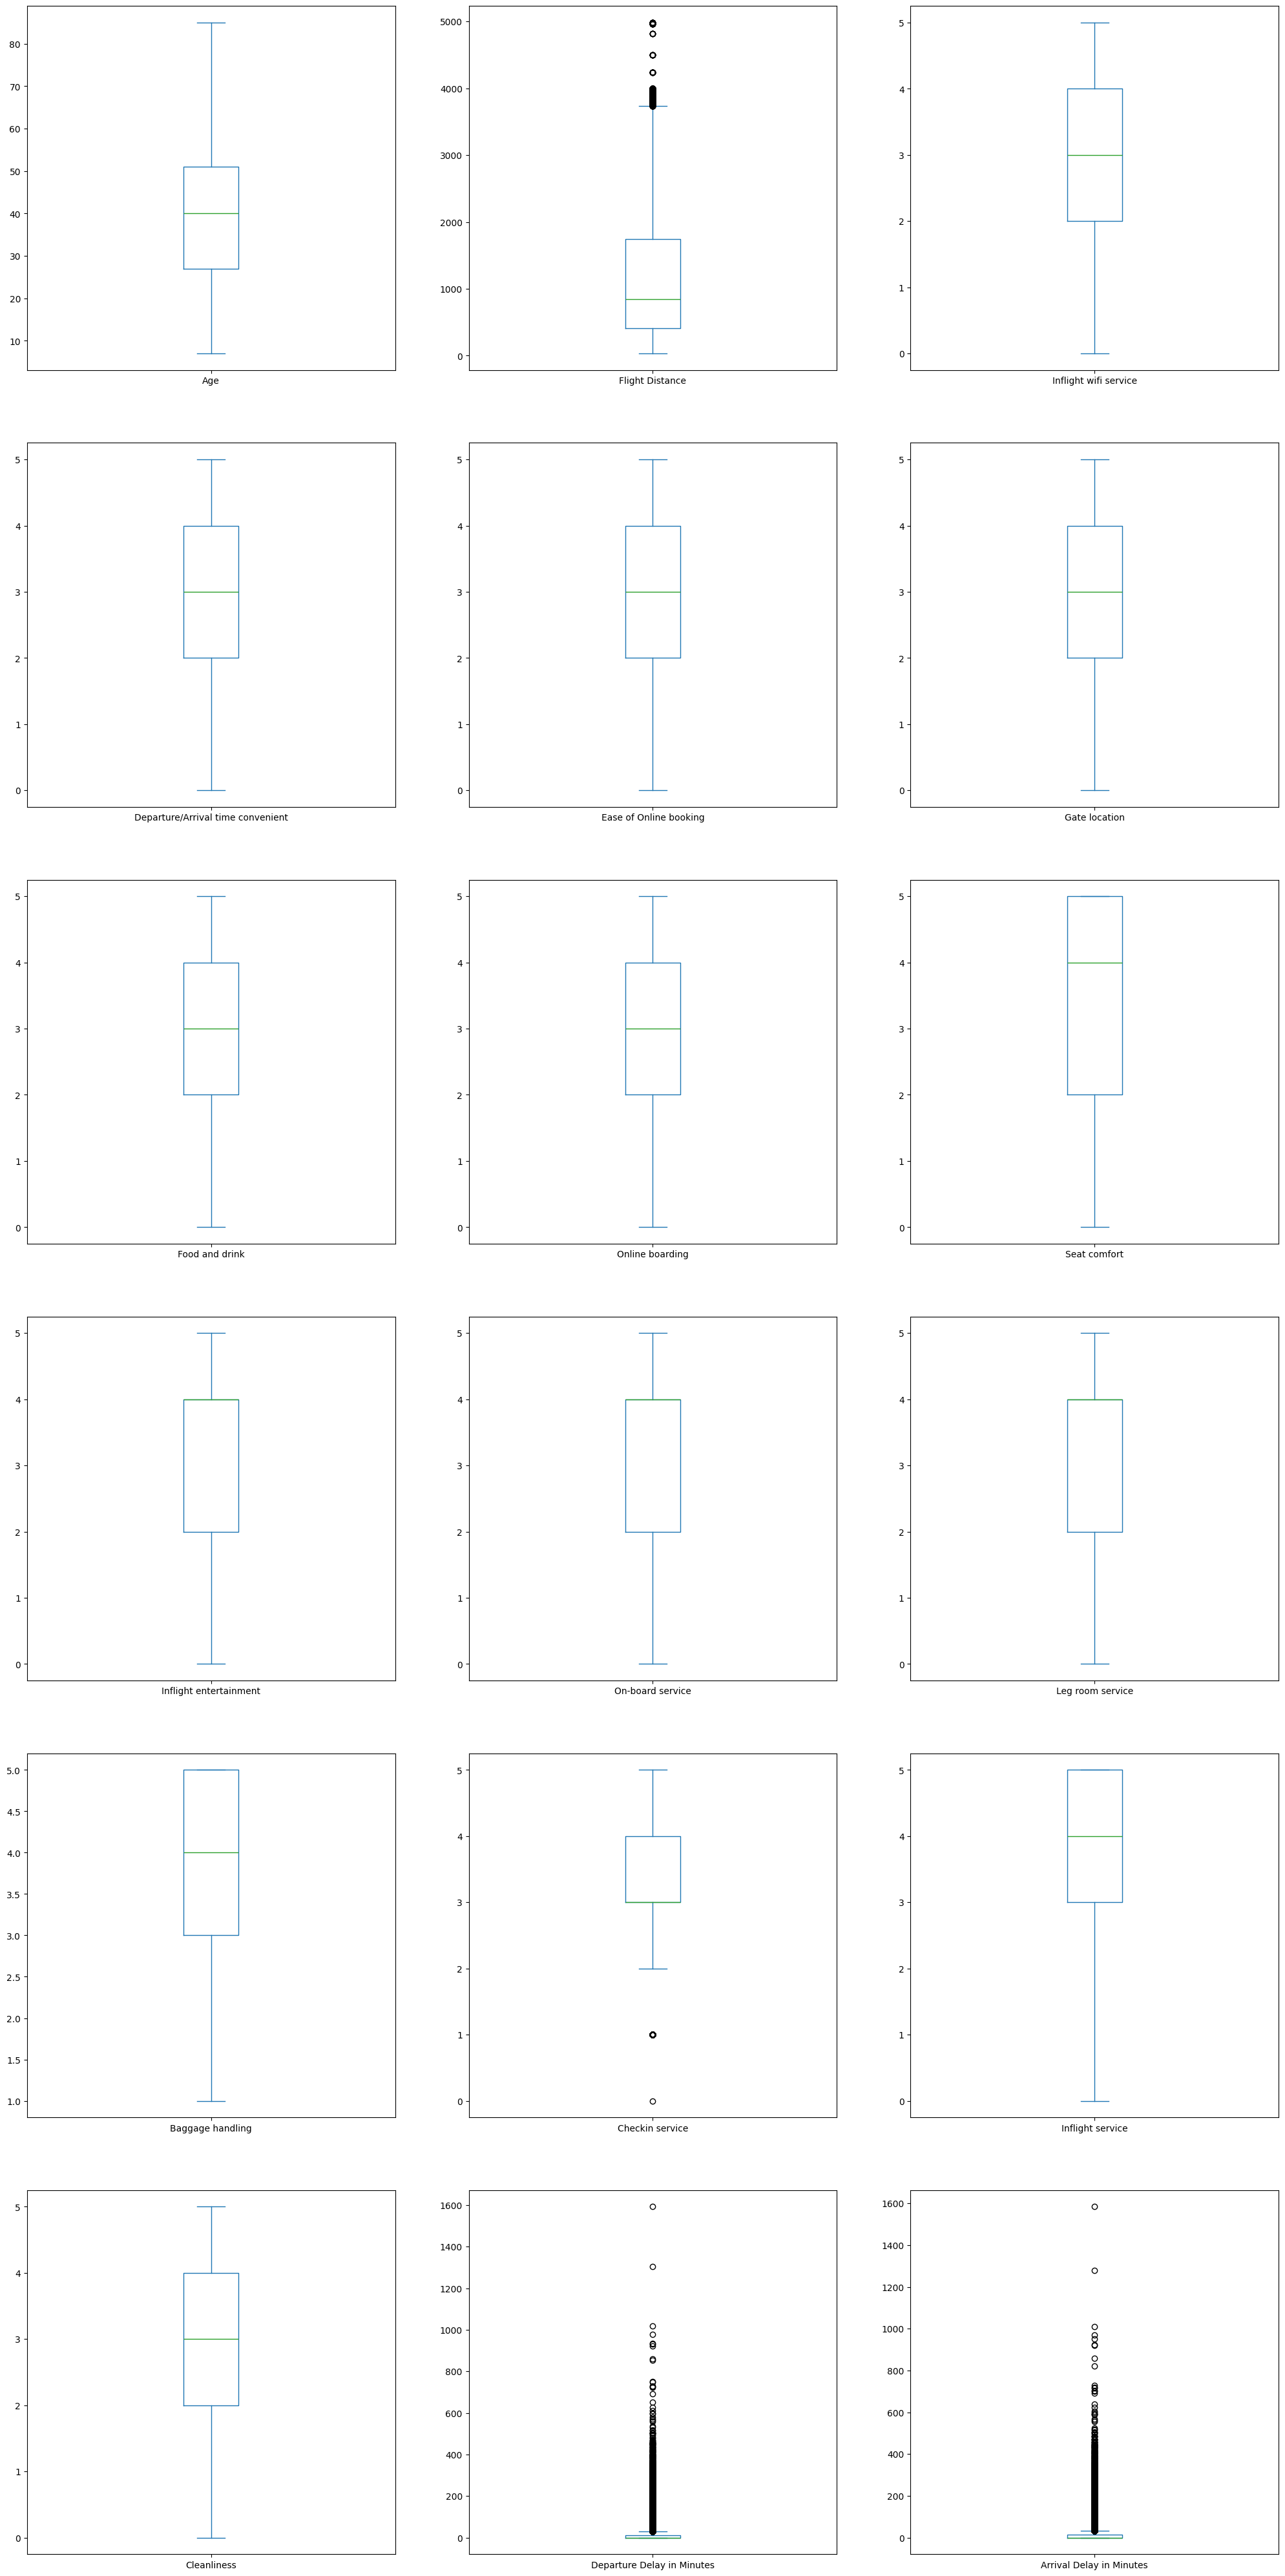

In [18]:
df.plot(kind = 'box', subplots = True, layout = (7, 3), figsize = (25, 60))
plt.show()

### Matriz de Correlación

Buscamos variables correlacionadas con la satisfacción del cliente. Cualquier conclusión debe estar de acuerdo con las posteriores que den los modelos de Machine Learning

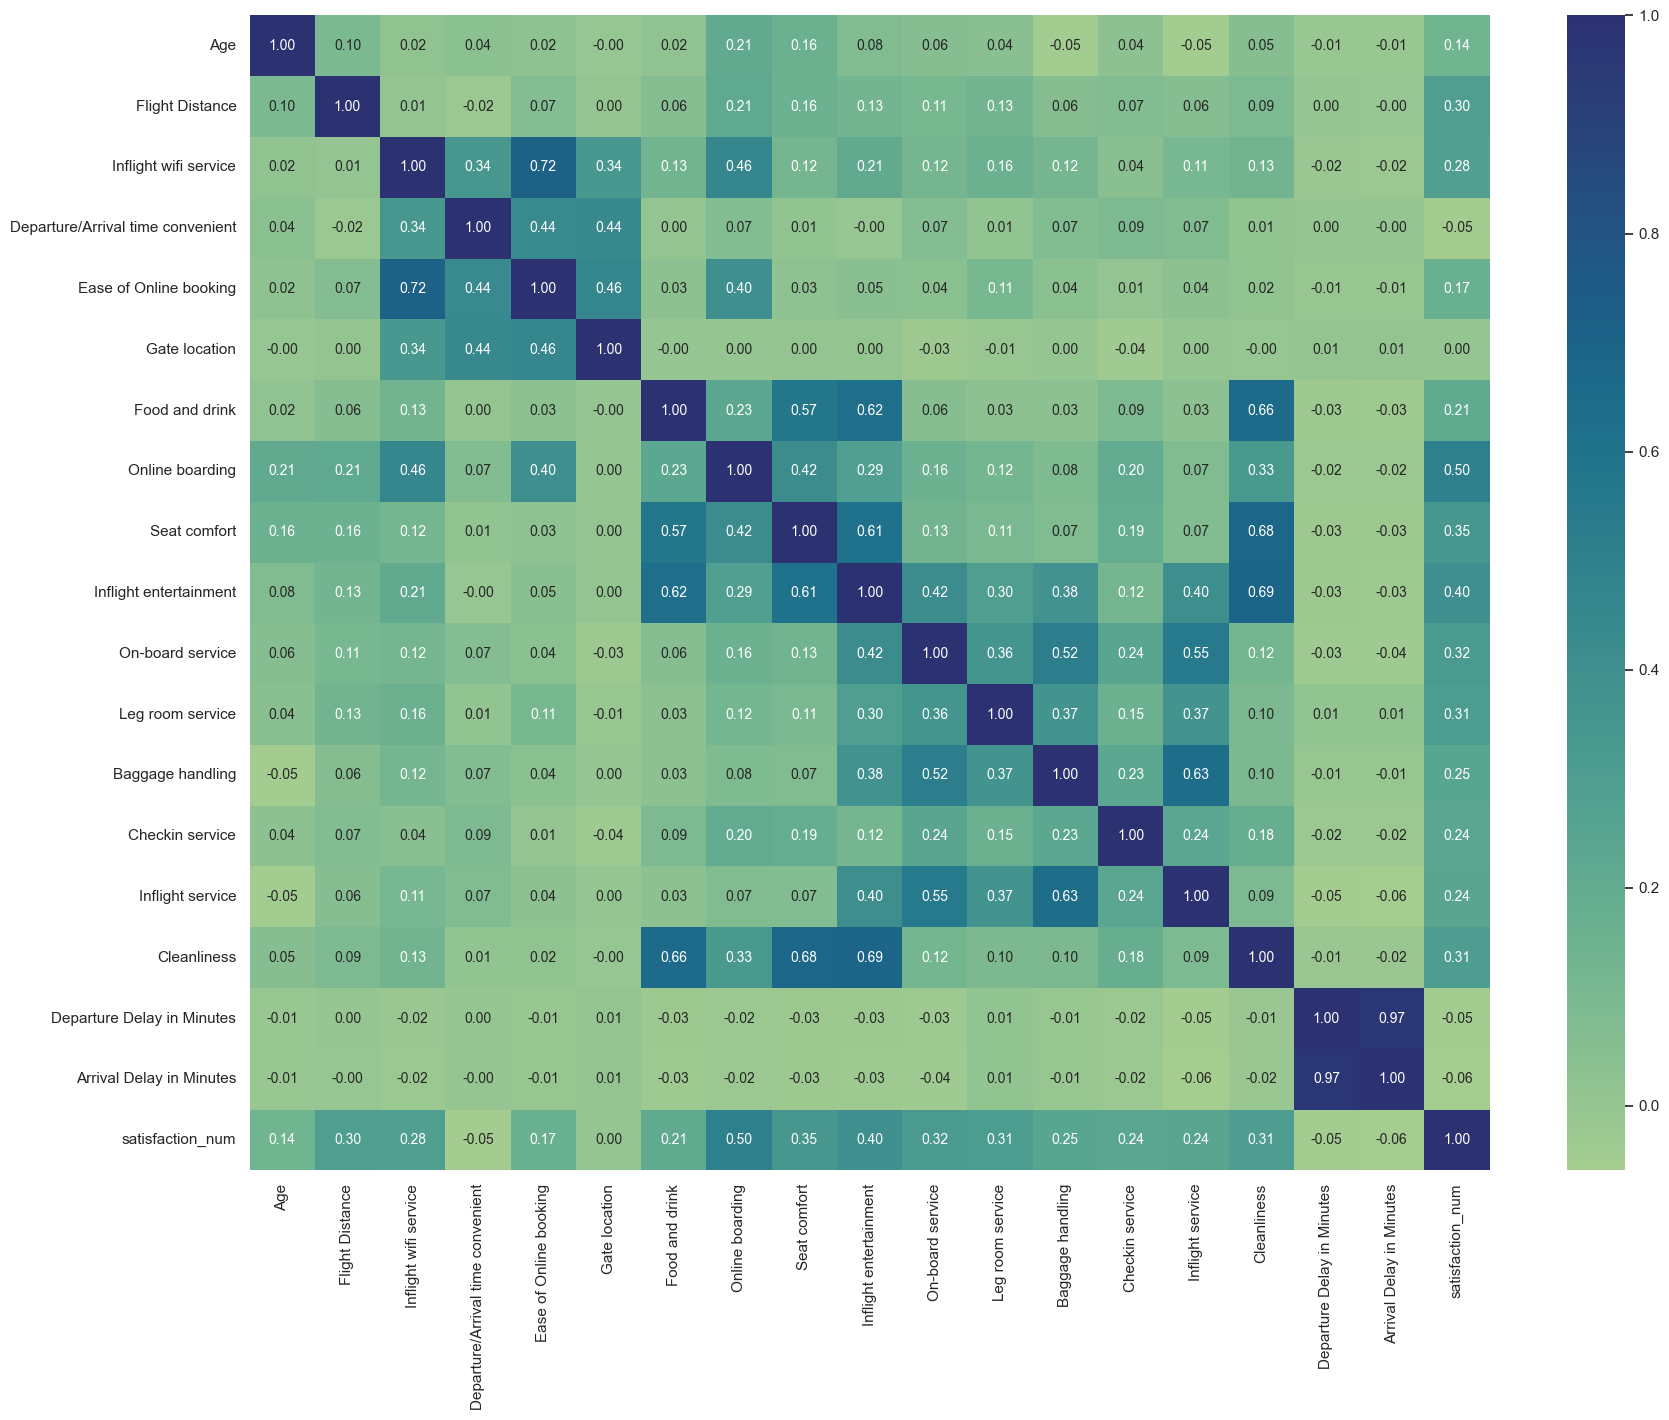

In [35]:
df1 = df[numerical_cols].copy()
df1['satisfaction_num'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

correlation = df1.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'crest');

### Observaciones:

* Según la matriz de correlación deberíamos prestar atención a las siguientes variables :
   - Online Boarding
   - Inflight entertainment,
   - Seat confort 
   - On-board service
   - Leg room service
   - Cleanliness
     

* Las variables Gate location, Departure Delay y Arrival Delay parecen no tener influencia, algo sorprendente

In [25]:

one_to_five = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
               'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
               'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

len(one_to_five)

14

In [ ]:
## Diagramas de tarta de las varibles discretas

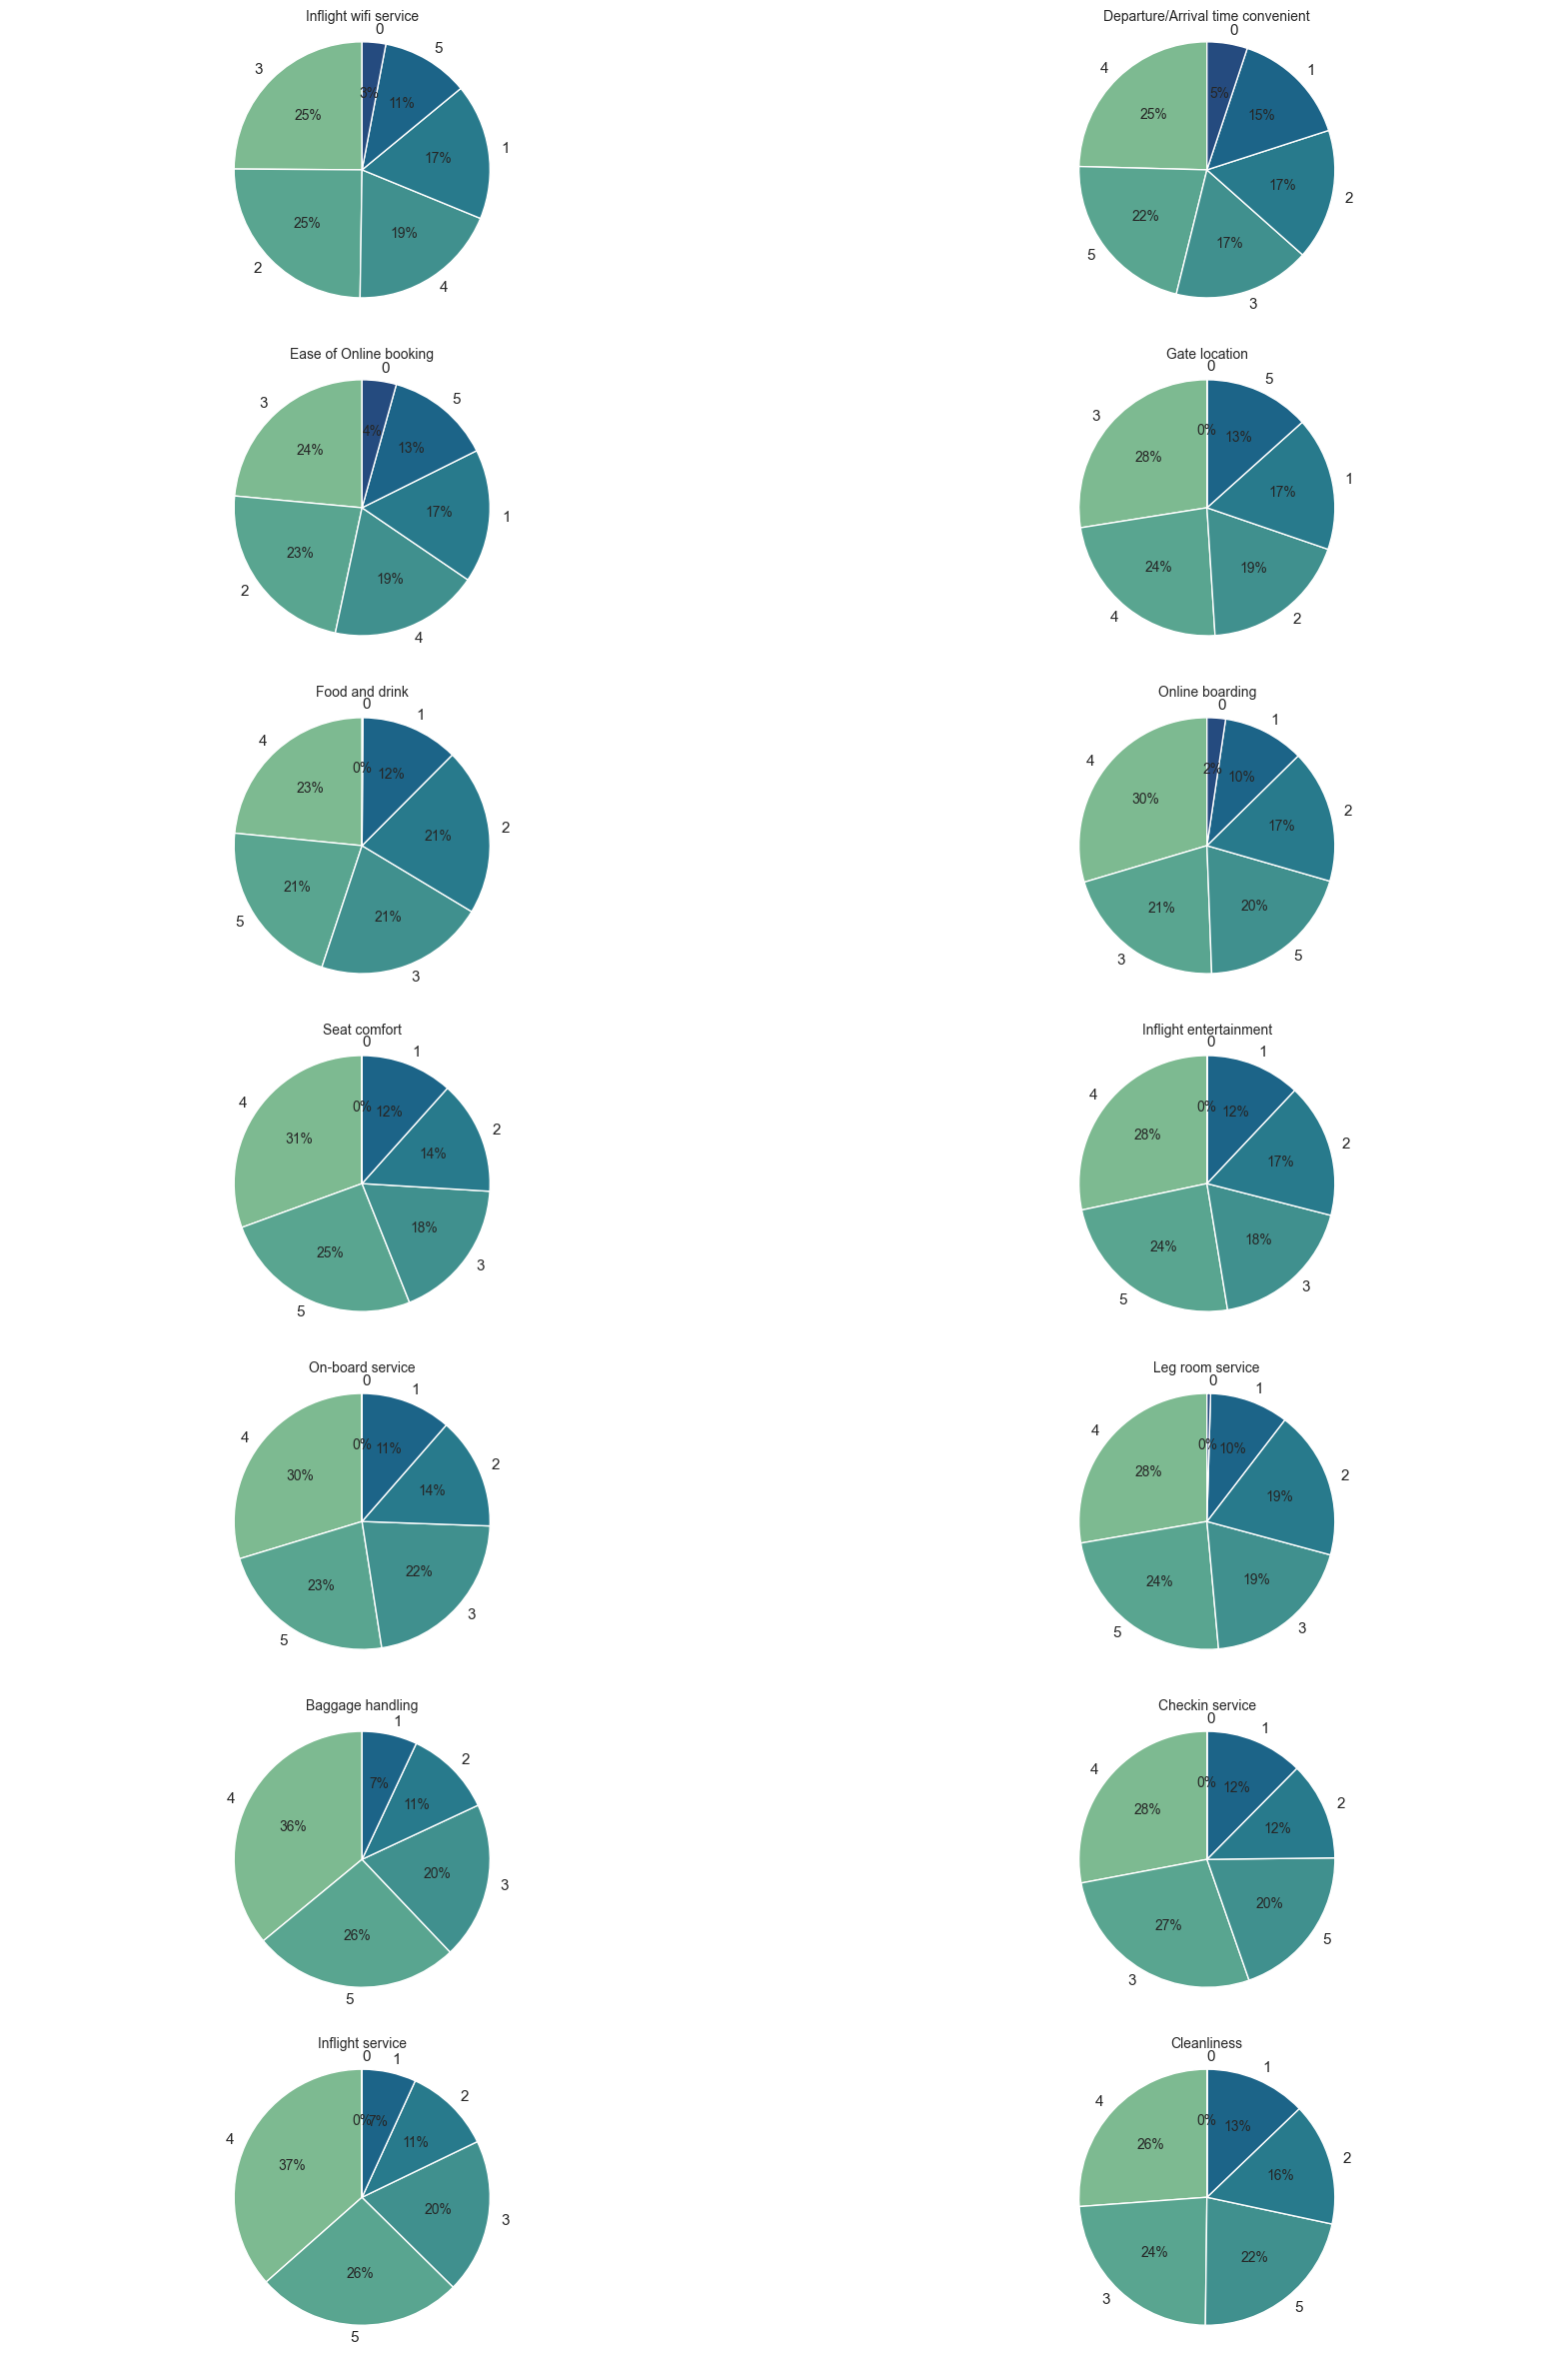

In [28]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="whitegrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(one_to_five):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("crest"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

In [41]:
for i, col in enumerate(one_to_five):
    column_values = df[col].value_counts()
    sizes = column_values.values
    
    # Porcentajes de valoraciones 4 y 5
    total = column_values.sum()
    percentage_4_5 = ((column_values[4] if 4 in column_values else 0) + 
                      (column_values[5] if 5 in column_values else 0)) / total * 100 

    print(f"{col}\n(4 ó 5: {percentage_4_5:.1f}%)")

Inflight wifi service
(4 ó 5: 30.1%)
Departure/Arrival time convenient
(4 ó 5: 46.1%)
Ease of Online booking
(4 ó 5: 32.2%)
Gate location
(4 ó 5: 36.9%)
Food and drink
(4 ó 5: 44.9%)
Online boarding
(4 ó 5: 49.5%)
Seat comfort
(4 ó 5: 56.0%)
Inflight entertainment
(4 ó 5: 52.6%)
On-board service
(4 ó 5: 52.5%)
Leg room service
(4 ó 5: 51.4%)
Baggage handling
(4 ó 5: 62.1%)
Checkin service
(4 ó 5: 47.8%)
Inflight service
(4 ó 5: 62.6%)
Cleanliness
(4 ó 5: 48.0%)


## Observaciones:

* El 63% de los pasajeros están satisfechos con el servicio a bordo (Inflight service) (puntuado 4 ó 5 sobre 5).
* El 62% de los pasajeros están satisfechos con el manejo del equipaje (Baggage handling).
* El 56% de los pasajeros se sienten cómodos en sus asientos (Seat comfort).
* El 53% de los pasajeros están satisfechos con el servicio a bordo (On-board service).
* El 51% de los pasajeros se sienten cómodos con la distancia entre los asientos (Leg room service).
* El 52% de los pasajeros están satisfechos con el entretenimiento a bordo


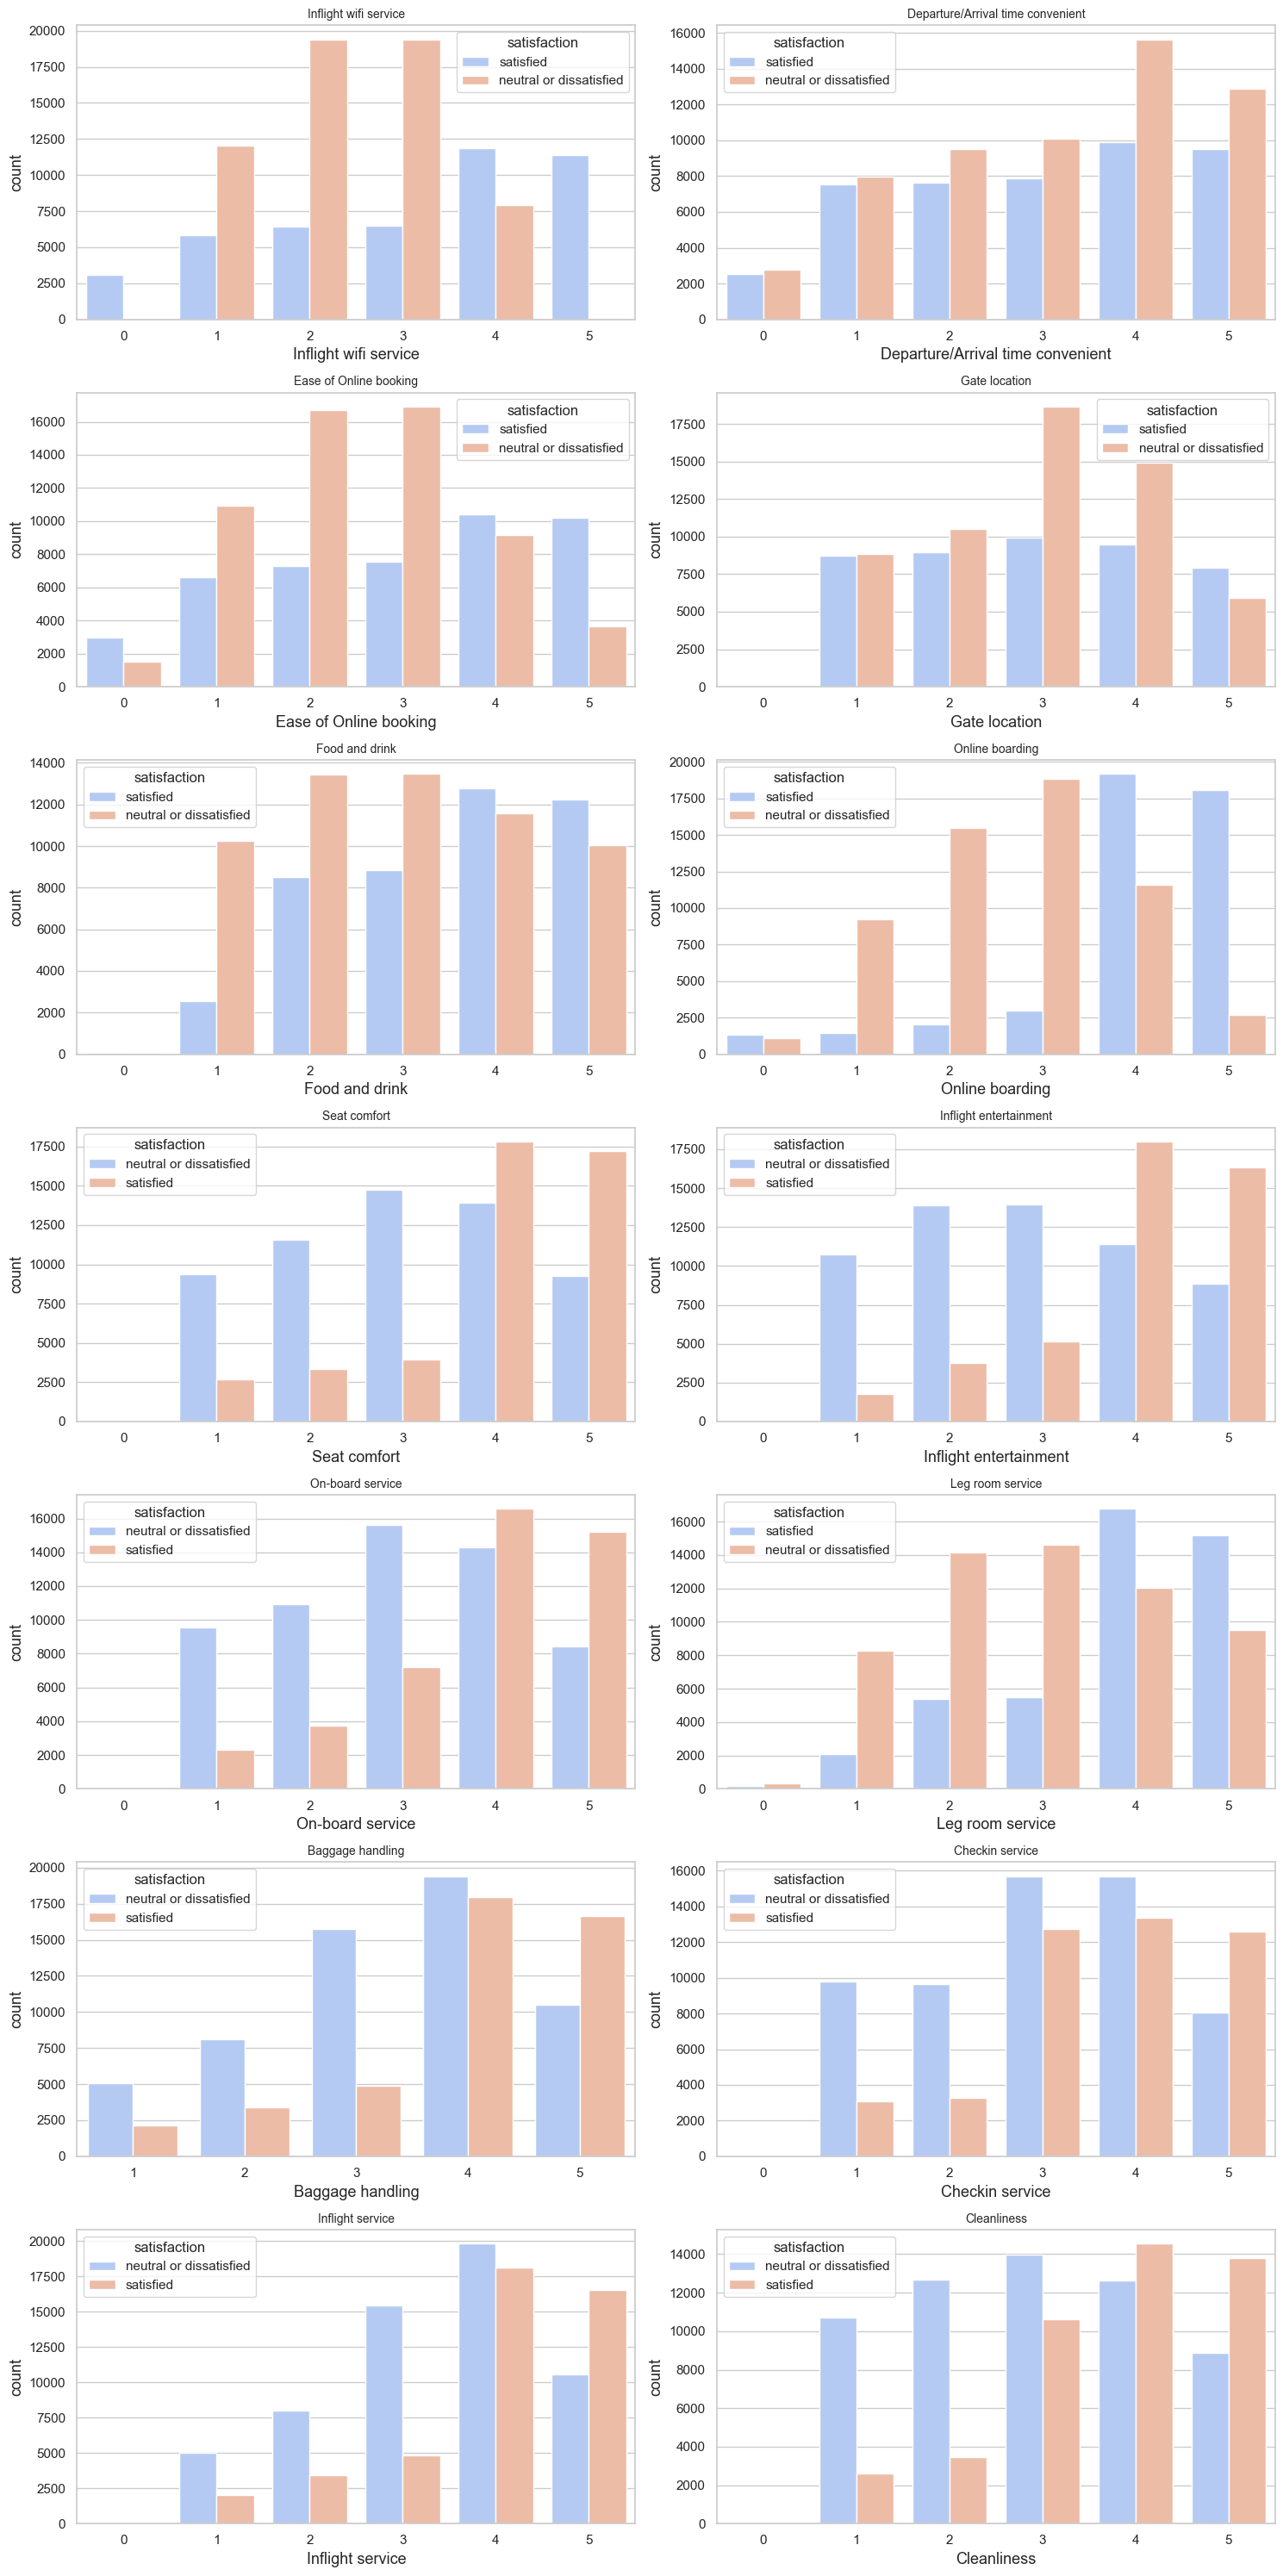

In [39]:
plt.figure(figsize=(15,30))
for i in range(len(one_to_five)):
    plt.subplot(7,2,i+1)
    plt.title(one_to_five[i])
      
    sns.countplot(x=df[one_to_five[i]], hue=df['satisfaction'], palette='coolwarm')
plt.tight_layout()